In [ ]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import warnings
from tqdm import tqdm

from agent import PPOAgent
from utilities import random_test, model_test, plot_test_rewards, plot_training_rewards

random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

warnings.filterwarnings("ignore")

history = {} # dict to store the test rewards

## Coinrun

### Training

In [6]:
game = "coinrun"

env = gym.make(
    "procgen:procgen-" + game + "-v0",
    num_levels=100,
    start_level=random_seed,
    rand_seed=random_seed,
    distribution_mode="easy",
    use_backgrounds=False,
    render_mode='rgb_array',
)

obs_space = env.observation_space.shape
n_actions = env.action_space.n
batch_size = 256
epochs = 4 
model_path = "./models"
gamma = 0.99
gae_lambda = 0.95
epsilon = 0.2
learning_rate = 5e-4
timesteps_per_rollout = 2048
num_episodes = 200
total_steps = timesteps_per_rollout * num_episodes

all_rewards = []
recent_rewards = []
best_moving_average = -float('inf')
steps_done = 0
reward_window = num_episodes / 5
episodes_done = 0
state = env.reset()
episode_cumulative_reward = 0

agent = PPOAgent(env, game, total_steps, epochs, batch_size, n_actions, model_path, gamma, gae_lambda, epsilon, learning_rate)


with tqdm(total=total_steps, desc="Training Progress", dynamic_ncols=True, leave=True) as pbar:
    while steps_done < total_steps:
        action, log_prob, value = agent.sample_action(state)
        next_state, reward, done, _ = env.step(action)

        agent.store(state, action, log_prob, value, reward, done)

        state = next_state
        episode_cumulative_reward += reward
        steps_done += 1

        # Update tqdm progress bar
        pbar.update(1)

        if steps_done % (timesteps_per_rollout*2) == 0:
            agent.train()

        if done:  # End of episode
            ## DEBUG
            # print("Episode reward:", episode_cumulative_reward)
            episodes_done += 1
            
            recent_rewards.append(episode_cumulative_reward)
            all_rewards.append(episode_cumulative_reward)

            if len(recent_rewards) > reward_window:
                recent_rewards.pop(0)  # Remove the oldest reward

            moving_average = np.mean(recent_rewards)
            # Update of tqdm description
            pbar.set_postfix({
                "Episodes": episodes_done,
                "Moving Avg": f"{moving_average:.2f}",
                "Best Avg": f"{best_moving_average:.2f}",
                "Overall Cumulative Reward": f"{np.sum(all_rewards):.2f}"
            })

            # Save the best model based on moving average
            if moving_average > best_moving_average and len(recent_rewards) == reward_window:
                best_moving_average = moving_average
                agent.save_model(f"best_model_{episodes_done}")

            # Reset for the next episode
            state = env.reset()
            episode_cumulative_reward = 0

print(f"Training finished after {episodes_done} episodes.")
agent.save_model("fully-trained-model")

Training Progress: 100%|██████████| 409600/409600 [15:43:06<00:00,  7.24it/s, Episodes=638, Moving Avg=3.00, Best Avg=5.25, Overall Cumulative Reward=1850.00]    

Training finished after 638 episodes.


Plot saved to ./results/coinrun_training_rewards.png


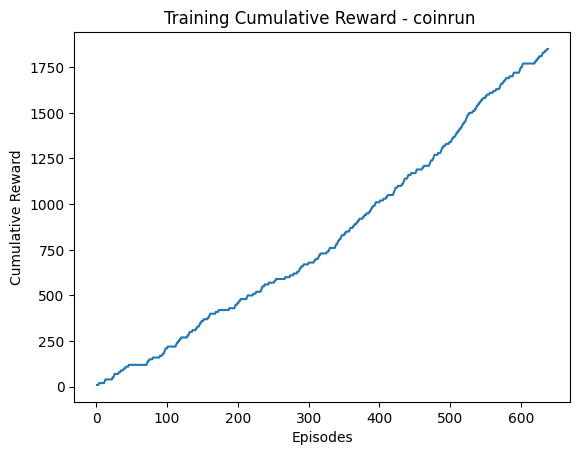

In [ ]:
plot_training_rewards(all_rewards, game)

### Testing

In [15]:
testing_seed = 1

testing_env = gym.make(
    "procgen:procgen-" + game + "-v0",
    num_levels=200,
    start_level=testing_seed,
    rand_seed=testing_seed,
    distribution_mode="easy",
    use_backgrounds=False,
    render_mode="rgb_array",
)

#### Fully trained agent

In [16]:
agent.load_model('fully-trained-model')
history["fully-trained"] = model_test(agent, testing_env)

##### Loading model ...


100%|██████████| 100/100 [3:14:35<00:00, 116.76s/it] 

Testing Highest Score:10.0
Testing Avg Score:3.9
Cumulative Reward over 100 episodes: 390.0


#### Best agent

In [17]:
agent.load_model('best_model_525')
history["best"] = model_test(agent, testing_env)

##### Loading model ...


100%|██████████| 100/100 [3:51:16<00:00, 138.77s/it] 

Testing Highest Score:10.0
Testing Avg Score:4.1
Cumulative Reward over 100 episodes: 410.0


#### Random agent

In [20]:
history["random"] = random_test(testing_env)

100%|██████████| 100/100 [15:22<00:00,  9.22s/it]

Testing Highest Score:10.0
Testing Avg Score:2.9
Cumulative Reward over 100 episodes: 290.0


Plot saved to ./results/coinrun_rewards.png


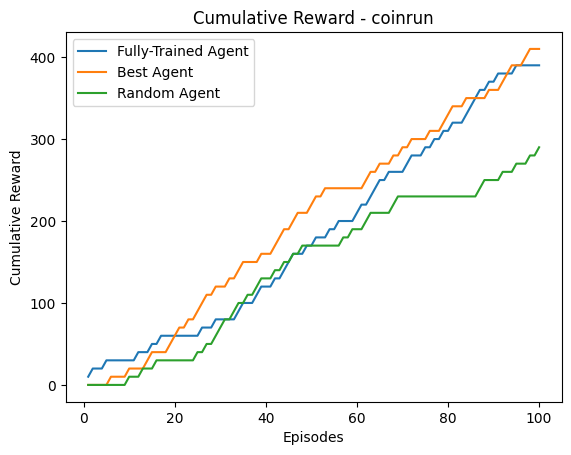

In [21]:
plot_test_rewards(history, game)

## Jumper

### Training

In [2]:
game = "jumper"

env = gym.make(
    "procgen:procgen-" + game + "-v0",
    num_levels=100,
    start_level=random_seed,
    rand_seed=random_seed,
    distribution_mode="easy",
    use_backgrounds=False,
    render_mode='rgb_array',
)

obs_space = env.observation_space.shape
n_actions = env.action_space.n
batch_size = 256
epochs = 4
model_path = "./models"
gamma = 0.99
gae_lambda = 0.95
epsilon = 0.2
learning_rate = 5e-4
timesteps_per_rollout = 2048
num_episodes = 200
total_steps = timesteps_per_rollout * num_episodes

all_rewards = []
recent_rewards = []
best_moving_average = -float('inf')
steps_done = 0
reward_window = num_episodes / 5
episodes_done = 0
state = env.reset()
episode_cumulative_reward = 0

agent = PPOAgent(env, game, total_steps, epochs, batch_size, n_actions, model_path, gamma, gae_lambda, epsilon, learning_rate)

with tqdm(total=total_steps, desc="Training Progress", dynamic_ncols=True, leave=True) as pbar:
    while steps_done < total_steps:
        action, log_prob, value = agent.sample_action(state)
        next_state, reward, done, _ = env.step(action)

        agent.store(state, action, log_prob, value, reward, done)

        state = next_state
        episode_cumulative_reward += reward
        steps_done += 1

        # Update tqdm progress bar
        pbar.update(1)

        if steps_done % (timesteps_per_rollout*2) == 0:
            agent.train()

        if done:  # End of episode
            ## DEBUG
            # print("Episode reward:", episode_cumulative_reward)
            episodes_done += 1

            recent_rewards.append(episode_cumulative_reward)
            all_rewards.append(episode_cumulative_reward)

            if len(recent_rewards) > reward_window:
                recent_rewards.pop(0)  # Remove the oldest reward

            
            moving_average = np.mean(recent_rewards)
            # Update of tqdm description
            pbar.set_postfix({
                "Episodes": episodes_done,
                "Moving Avg": f"{moving_average:.2f}",
                "Best Avg": f"{best_moving_average:.2f}",
                "Overall Cumulative Reward": f"{np.sum(all_rewards):.2f}"
            })

            # Save the best model based on moving average
            if moving_average > best_moving_average and len(recent_rewards) == reward_window:
                best_moving_average = moving_average
                agent.save_model(f"best_model_{episodes_done}")

            # Reset for the next episode
            state = env.reset()
            episode_cumulative_reward = 0

print(f"Training finished after {episodes_done} episodes.")
agent.save_model("fully-trained-model")

Training Progress: 100%|██████████| 409600/409600 [10:07:45<00:00, 11.23it/s, Episodes=1134, Moving Avg=3.25, Best Avg=5.75, Overall Cumulative Reward=4060.00]   


Training finished after 1134 episodes.


Plot saved to ./results/jumper_training_rewards.png


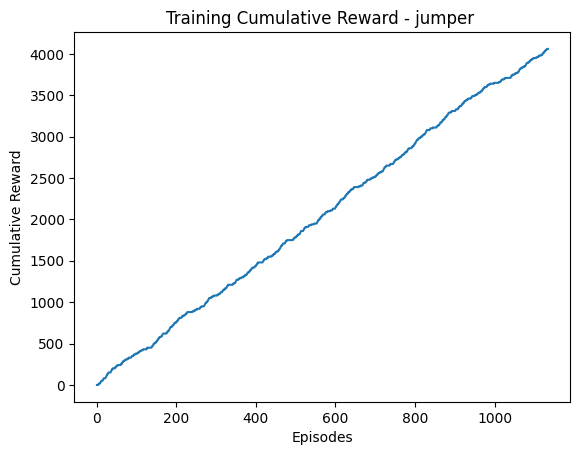

In [3]:
plot_training_rewards(all_rewards, game)

### Testing

In [4]:
testing_seed = 1

testing_env = gym.make(
    "procgen:procgen-" + game + "-v0",
    num_levels=200,
    start_level=testing_seed,
    rand_seed=testing_seed,
    distribution_mode="easy",
    use_backgrounds=False,
    render_mode="rgb_array",
)

#### Fully trained agent

In [5]:
agent.load_model('fully-trained-model')
history['fully-trained'] = model_test(agent, testing_env)

##### Loading model ...


100%|██████████| 100/100 [1:01:13<00:00, 36.74s/it]

Testing Highest Score:10.0
Testing Avg Score:3.6
Cumulative Reward over 100 episodes: 360.0


#### Best agent

In [6]:
agent.load_model('best_model_639')
history['best'] = model_test(agent, testing_env)

##### Loading model ...


100%|██████████| 100/100 [1:08:20<00:00, 41.01s/it]

Testing Highest Score:10.0
Testing Avg Score:3.6
Cumulative Reward over 100 episodes: 360.0


#### Random agent

In [14]:
history['random'] = random_test(testing_env)

100%|██████████| 100/100 [05:20<00:00,  3.21s/it]

Testing Highest Score:10.0
Testing Avg Score:2.2
Cumulative Reward over 100 episodes: 220.0


Plot saved to ./results/jumper_rewards.png


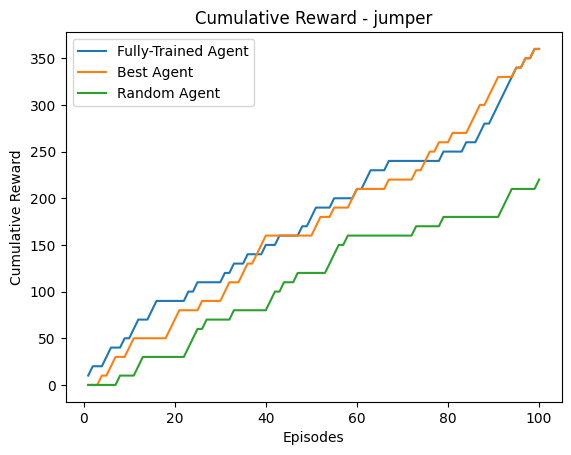

In [15]:
plot_test_rewards(history, game)

## Ninja

### Training

In [2]:
game = "ninja"

env = gym.make(
    "procgen:procgen-" + game + "-v0",
    num_levels=100,
    start_level=random_seed,
    rand_seed=random_seed,
    distribution_mode="easy",
    use_backgrounds=False,
    render_mode='rgb_array',
)

obs_space = env.observation_space.shape
n_actions = env.action_space.n
batch_size = 256 
epochs = 4
model_path = "./models"
gamma = 0.99
gae_lambda = 0.95
epsilon = 0.2
learning_rate = 5e-4
timesteps_per_rollout = 2048
num_episodes = 200
total_steps = timesteps_per_rollout * num_episodes

all_rewards = []
recent_rewards = []
best_moving_average = -float('inf')
steps_done = 0
reward_window = num_episodes / 5
episodes_done = 0
state = env.reset()
episode_cumulative_reward = 0

agent = PPOAgent(env, game, total_steps, epochs, batch_size, n_actions, model_path, gamma, gae_lambda, epsilon, learning_rate)


with tqdm(total=total_steps, desc="Training Progress", dynamic_ncols=True, leave=True) as pbar:
    while steps_done < total_steps:
        action, log_prob, value = agent.sample_action(state)
        next_state, reward, done, _ = env.step(action)

        agent.store(state, action, log_prob, value, reward, done)

        state = next_state
        episode_cumulative_reward += reward
        steps_done += 1

        # Update tqdm progress bar
        pbar.update(1)

        if steps_done % (timesteps_per_rollout*2) == 0:
            agent.train()

        if done:  # End of episode
            ## DEBUG
            # print("Episode reward:", episode_cumulative_reward)
            episodes_done += 1

            recent_rewards.append(episode_cumulative_reward)
            all_rewards.append(episode_cumulative_reward)

            if len(recent_rewards) > reward_window:
                recent_rewards.pop(0)  # Remove the oldest reward

            moving_average = np.mean(recent_rewards)
            # Update of tqdm description
            pbar.set_postfix({
                "Episodes": episodes_done,
                "Moving Avg": f"{moving_average:.2f}",
                "Best Avg": f"{best_moving_average:.2f}",
                "Overall Cumulative Reward": f"{np.sum(all_rewards):.2f}"
            })

            # Save the best model based on moving average
            if moving_average > best_moving_average and len(recent_rewards) == reward_window:
                best_moving_average = moving_average
                agent.save_model(f"best_model_{episodes_done}")

            # Reset for the next episode
            state = env.reset()
            episode_cumulative_reward = 0

print(f"Training finished after {episodes_done} episodes.")
agent.save_model("fully-trained-model")

Training Progress: 100%|██████████| 409600/409600 [5:20:07<00:00, 21.32it/s, Episodes=1017, Moving Avg=3.25, Best Avg=5.25, Overall Cumulative Reward=2680.00]   

Training finished after 1017 episodes.


Plot saved to ./results/ninja_training_rewards.png


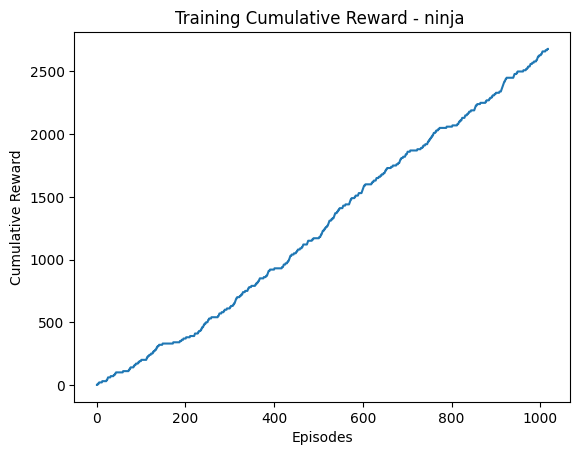

In [3]:
plot_training_rewards(all_rewards, game)

### Testing

In [4]:
testing_seed = 1

testing_env = gym.make(
    "procgen:procgen-" + game + "-v0",
    num_levels=200,
    start_level=testing_seed,
    rand_seed=testing_seed,
    distribution_mode="easy",
    use_backgrounds=False,
    render_mode="rgb_array",
)

#### Fully trained agent

In [5]:
agent.load_model('fully-trained-model')
history['fully-trained'] = model_test(agent, testing_env)

##### Loading model ...


100%|██████████| 100/100 [38:52<00:00, 23.32s/it]

Testing Highest Score:10.0
Testing Avg Score:3.6
Cumulative Reward over 100 episodes: 360.0


#### Best agent

In [6]:
agent.load_model('best_model_544')
history['best'] = model_test(agent, testing_env)

##### Loading model ...


100%|██████████| 100/100 [38:26<00:00, 23.07s/it]

Testing Highest Score:10.0
Testing Avg Score:3.5
Cumulative Reward over 100 episodes: 350.0


#### Random agent

In [7]:
history['random'] = random_test(testing_env)

100%|██████████| 100/100 [03:32<00:00,  2.12s/it]

Testing Highest Score:10.0
Testing Avg Score:2.6
Cumulative Reward over 100 episodes: 260.0


Plot saved to ./results/ninja_rewards.png


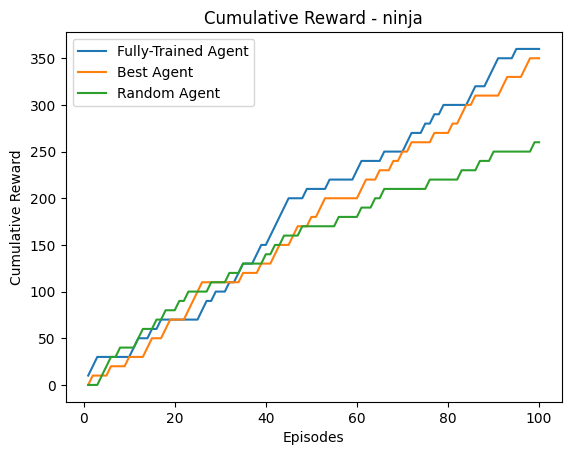

In [8]:
plot_test_rewards(history, game)